## Missing Value_Imputation

In [14]:
import warnings
warnings.filterwarnings('ignore')

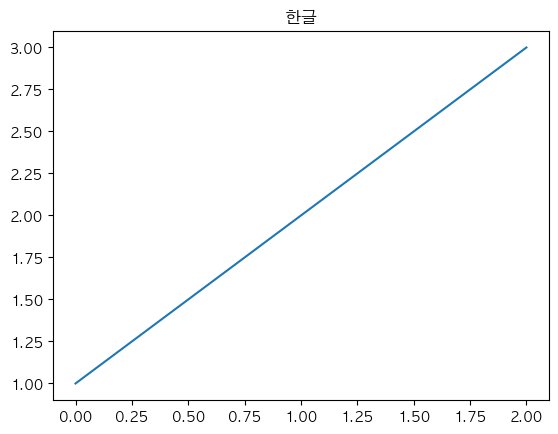

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="AppleGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

### 1. 결측치 제거

In [16]:
import pandas as pd

df = pd.read_csv('../data/울산_전처리_ver6.csv')

In [17]:
df.isna().sum()

호출부호                      0
입항일시                      0
출항일시                      0
접안_대기시간_분                 0
출항_대기시간_분                 0
Service_Time_Start        0
Service_Time_End          0
계선장소_코드                   0
계선장소_숫자                   0
계선장소명                     0
선박용도                      0
Service_Time_분            0
대기율                      25
총톤수                   10524
재화중량톤수                12204
선박제원(총길이, m)            612
선박제원(너비, m)             612
만재흘수(m)               10521
깊이(m)                 10521
길이1(m)                10521
선박국적(code)            10521
선박국적(이름)              10521
ETA_Year                  0
ETA_Month                 0
ETA_Day                   0
ETA_Hour                  0
ETA_Minute                0
일시                     2645
풍속(m/s)                6874
풍향(deg)                7660
GUST풍속(m/s)            6723
현지기압(hPa)              2890
습도(%)                  4237
기온(°C)                 2825
수온(°C)                 4099
최대파고(m)             

#### 입항,출항 일시가 같은 행 제거

In [18]:
rows_with_null = df[df['대기율'].isnull()]

In [19]:
rows_with_null.head()

,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,...,GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
3517,60821,2020-12-18 18:00:00,2020-12-18 18:00,0,0.0,2020-12-18 18:00:00,2020-12-18 18:00:00,MBO,2,온산2부두,...,7.7,1023.9,49.0,8.3,18.1,1.8,1.3,0.9,8.0,57.0
3607,66597,2020-12-09 12:30:00,2020-12-09 12:30,0,0.0,2020-12-09 12:30:00,2020-12-09 12:30:00,MLJ,1,장생포호안,...,3.9,1025.9,44.0,9.0,18.7,1.4,0.9,0.6,7.1,34.0
5351,90831,2020-12-07 18:20:00,2020-12-07 18:20,0,0.0,2020-12-07 18:20:00,2020-12-07 18:20:00,MBN,12,현대오일터미널신항부두,...,3.8,1024.2,49.0,11.9,19.2,1.1,0.6,0.4,6.4,37.0
5805,91116,2022-10-21 10:10:00,2022-10-21 11:30,0,80.0,2022-10-21 10:10:00,2022-10-21 10:10:00,MLJ,1,장생포호안,...,NaN,1025.9,70.0,20.1,22.7,1.1,0.7,0.5,3.2,269.0
6650,100611,2022-07-04 07:30:00,2022-07-04 08:15,0,45.0,2022-07-04 07:30:00,2022-07-04 07:30:00,MLJ,1,장생포호안,...,2.3,1007.4,93.0,26.3,24.8,0.6,0.4,0.3,3.6,144.0


In [20]:
rows_with_null[['접안_대기시간_분','Service_Time_분','대기율']].head()

,접안_대기시간_분,Service_Time_분,대기율
3517,0,0.0,NaN
3607,0,0.0,NaN
5351,0,0.0,NaN
5805,0,0.0,NaN
6650,0,0.0,NaN


In [21]:
df = df.dropna(subset=['대기율'])

#### 선박용도별 중앙값으로 결측치 대체

In [22]:
df['총톤수']

0           NaN
1           NaN
2           NaN
3           NaN
4           141
          ...  
72134    64,321
72135    64,555
72136    20,117
72137     6,051
72138    29,735
Name: 총톤수, Length: 72114, dtype: object

In [23]:
# 쉽표 제거
columns_to_fix = ['총톤수', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)']
df[columns_to_fix] = df[columns_to_fix].replace({',': ''}, regex=True)

# 숫자로 변환
df[columns_to_fix] = df[columns_to_fix].apply(pd.to_numeric, errors='coerce')

In [24]:
grouped_by_usage = df.groupby('선박용도')[columns_to_fix]

- 분포 확인

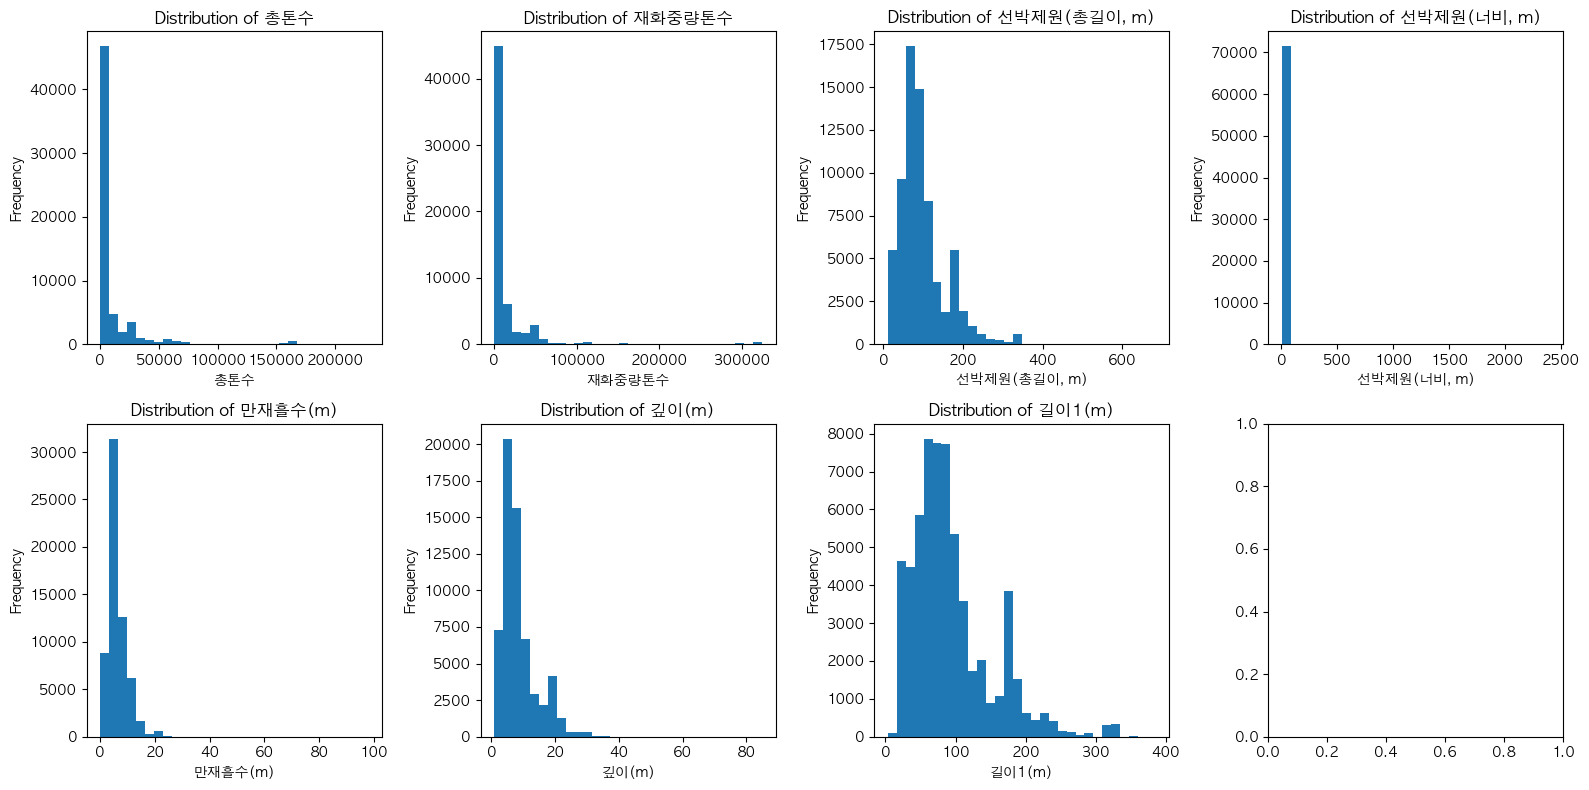

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, column in enumerate(columns_to_fix):
    ax = axes[i // 4, i % 4]
    ax.hist(df[column].dropna(), bins=30)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- 선박용도별 중앙값으로 대체

In [26]:
df['총톤수'] = df.groupby('선박용도')['총톤수'].transform(lambda x: x.fillna(x.median()))
df['재화중량톤수'] = df.groupby('선박용도')['재화중량톤수'].transform(lambda x: x.fillna(x.median()))
df['선박제원(총길이, m)'] = df.groupby('선박용도')['선박제원(총길이, m)'].transform(lambda x: x.fillna(x.median()))
df['선박제원(너비, m)'] = df.groupby('선박용도')['선박제원(너비, m)'].transform(lambda x: x.fillna(x.median()))
df['만재흘수(m)'] = df.groupby('선박용도')['만재흘수(m)'].transform(lambda x: x.fillna(x.median()))
df['깊이(m)'] = df.groupby('선박용도')['깊이(m)'].transform(lambda x: x.fillna(x.median()))
df['길이1(m)'] = df.groupby('선박용도')['길이1(m)'].transform(lambda x: x.fillna(x.median()))

In [27]:
df.isna().sum()

호출부호                      0
입항일시                      0
출항일시                      0
접안_대기시간_분                 0
출항_대기시간_분                 0
Service_Time_Start        0
Service_Time_End          0
계선장소_코드                   0
계선장소_숫자                   0
계선장소명                     0
선박용도                      0
Service_Time_분            0
대기율                       0
총톤수                       2
재화중량톤수                    2
선박제원(총길이, m)              1
선박제원(너비, m)               1
만재흘수(m)                   2
깊이(m)                     2
길이1(m)                    2
선박국적(code)            10519
선박국적(이름)              10519
ETA_Year                  0
ETA_Month                 0
ETA_Day                   0
ETA_Hour                  0
ETA_Minute                0
일시                     2644
풍속(m/s)                6871
풍향(deg)                7657
GUST풍속(m/s)            6720
현지기압(hPa)              2889
습도(%)                  4236
기온(°C)                 2824
수온(°C)                 4097
최대파고(m)             

#### 국가 코드_제거

In [28]:
df.drop(columns = ['선박국적(code)','선박국적(이름)'], inplace = True)

#### 일시_제거

In [29]:
df.drop(columns = '일시', inplace = True)

#### 날씨 데이터_선형보간

In [30]:
df[df['풍속(m/s)'].isnull()]

,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,...,GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
4,552,2021-07-03 16:20:00,2021-07-05 04:15,0,0.0,2021-07-03 16:20:00,2021-07-05 04:15:00,MLJ,1,장생포호안,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,584,2021-04-29 16:25:00,2021-07-24 03:55,0,0.0,2021-04-29 16:25:00,2021-07-24 03:55:00,MBM,1,매암부두,...,NaN,1004.8,72.0,16.7,NaN,1.2,0.7,0.5,4.3,30.0
76,637,2021-01-16 23:50:00,2021-01-19 01:05,0,0.0,2021-01-16 23:50:00,2021-01-19 01:05:00,MQP,3,현중해양의장안벽,...,14.0,1021.8,51.0,4.4,15.4,4.2,2.7,1.9,9.1,358.0
89,637,2021-04-06 17:20:00,2021-04-07 15:15,0,0.0,2021-04-06 17:20:00,2021-04-07 15:15:00,MQP,3,현중해양의장안벽,...,NaN,1017.5,60.0,16.1,NaN,1.4,0.8,0.6,5.8,50.0
90,637,2021-04-08 23:20:00,2021-04-10 05:50,0,0.0,2021-04-08 23:20:00,2021-04-10 05:50:00,MQP,3,현중해양의장안벽,...,NaN,1019.3,67.0,16.1,NaN,1.9,1.1,0.8,7.1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72116,ZGGC2,2021-05-04 14:30:00,2021-05-05 11:10,0,0.0,2021-05-04 14:30:00,2021-05-05 11:10:00,MBF,2,신항남방파제T/S부두 02,...,NaN,1014.5,82.0,17.8,17.0,2.5,1.5,1.1,4.9,197.0
72120,ZGGU,2021-04-09 07:30:00,2021-04-10 09:30,0,0.0,2021-04-09 07:30:00,2021-04-10 09:30:00,MB7,1,7부두 01,...,NaN,1021.9,62.0,15.9,NaN,1.3,0.9,0.6,6.4,30.0
72128,ZGGU2,2021-07-12 09:12:00,2021-07-13 10:50,608,0.0,2021-07-12 19:20:00,2021-07-13 10:50:00,WAE,1,정박지-E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72131,ZGHJ4,2021-06-11 19:18:00,2021-06-29 19:10,802,0.0,2021-06-12 08:40:00,2021-06-29 19:10:00,MBN,27,용연부두 02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 날씨-시계열 데이터 선형보간

In [31]:
df = df.sort_values(by=['ETA_Year','ETA_Month', 'ETA_Day', 'ETA_Hour'])

In [32]:
# 'ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour' 순서로 컬럼 선택
df = df[['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour'] + [col for col in df.columns if col not in ['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour']]]

In [33]:
df

,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,...,GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
21970,2020,1,1,0,185303,2020-01-01 00:10:00,2020-01-01 04:50,0,0.0,2020-01-01 00:10:00,...,10.9,NaN,47.0,3.8,17.5,4.4,3.0,2.1,10.7,36.0
4603,2020,1,1,1,88238,2020-01-01 01:05:00,2020-01-01 08:15,0,0.0,2020-01-01 01:05:00,...,12.2,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0
46120,2020,1,1,3,D7CH,2020-01-01 03:40:00,2020-01-01 13:30,0,0.0,2020-01-01 03:40:00,...,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0
61365,2020,1,1,3,DSRB9,2020-01-01 03:05:00,2020-01-01 14:55,0,0.0,2020-01-01 03:05:00,...,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0
49158,2020,1,1,4,D7SC,2020-01-01 04:30:00,2020-01-01 20:40,0,0.0,2020-01-01 04:30:00,...,14.4,1028.3,53.0,3.4,17.3,3.5,2.1,1.5,9.1,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,2022,12,31,9,130064,2022-12-31 09:45:00,2022-12-31 16:15,0,0.0,2022-12-31 09:45:00,...,14.4,1028.7,64.0,5.7,16.1,2.2,1.6,1.1,5.3,0.0
63837,2022,12,31,10,HOXG,2022-12-31 10:05:00,2022-12-31 20:10,0,0.0,2022-12-31 10:05:00,...,16.1,1029.3,60.0,5.6,16.1,2.3,1.5,1.1,5.8,36.0
25250,2022,12,31,15,200013,2022-12-31 15:55:00,2022-12-31 23:15,0,0.0,2022-12-31 15:55:00,...,9.8,1027.6,49.0,7.8,16.1,2.4,1.5,1.0,5.8,6.0
3656,2022,12,31,17,66597,2022-12-31 17:55:00,2022-12-31 20:40,0,0.0,2022-12-31 17:55:00,...,8.2,1027.6,47.0,8.0,16.2,2.2,1.3,0.9,5.8,33.0


In [34]:
columns_to_interpolate = ['풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)',
                           '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)']

# 선형 보간
# 날짜 및 시간 정보를 합치고 DatetimeIndex 생성 (method = time 사용을 위함)
df['Datetime'] = pd.to_datetime(df['ETA_Year'].astype(str) + '-' + df['ETA_Month'].astype(str) + '-' + df['ETA_Day'].astype(str) + ' ' + df['ETA_Hour'].astype(str) + ':00:00')
df.set_index('Datetime', inplace=True)

# 선형 보간
df[columns_to_interpolate] = df[columns_to_interpolate].interpolate(method = 'time', limit_direction = 'both', limit_area = 'inside')

In [35]:
df.isna().sum()

ETA_Year              0
ETA_Month             0
ETA_Day               0
ETA_Hour              0
호출부호                  0
입항일시                  0
출항일시                  0
접안_대기시간_분             0
출항_대기시간_분             0
Service_Time_Start    0
Service_Time_End      0
계선장소_코드               0
계선장소_숫자               0
계선장소명                 0
선박용도                  0
Service_Time_분        0
대기율                   0
총톤수                   2
재화중량톤수                2
선박제원(총길이, m)          1
선박제원(너비, m)           1
만재흘수(m)               2
깊이(m)                 2
길이1(m)                2
ETA_Minute            0
풍속(m/s)               0
풍향(deg)               0
GUST풍속(m/s)           0
현지기압(hPa)             1
습도(%)                 0
기온(°C)                0
수온(°C)                0
최대파고(m)               0
유의파고(m)               0
평균파고(m)               0
파주기(sec)              0
파향(deg)               0
dtype: int64

In [36]:
df[df['총톤수'].isnull()]['선박용도'] # 하나밖에 없는 선박용도

Datetime
2021-11-30 00:00:00      화객선
2022-02-10 15:00:00    원양 어선
Name: 선박용도, dtype: object

In [37]:
df.dropna(inplace = True)

In [43]:
df.reset_index(inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72111 entries, 0 to 72110
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Datetime            72111 non-null  datetime64[ns]
 1   ETA_Year            72111 non-null  int64         
 2   ETA_Month           72111 non-null  int64         
 3   ETA_Day             72111 non-null  int64         
 4   ETA_Hour            72111 non-null  int64         
 5   호출부호                72111 non-null  object        
 6   입항일시                72111 non-null  object        
 7   출항일시                72111 non-null  object        
 8   접안_대기시간_분           72111 non-null  int64         
 9   출항_대기시간_분           72111 non-null  float64       
 10  Service_Time_Start  72111 non-null  object        
 11  Service_Time_End    72111 non-null  object        
 12  계선장소_코드             72111 non-null  object        
 13  계선장소_숫자             72111 non-null  int64     

In [46]:
df.to_csv('../data/울산_전처리_ver7.csv', index = False, encoding = 'utf-8-sig')

### 2. 이상치

In [38]:
df['접안_대기시간_분']

Datetime
2020-01-01 01:00:00    0
2020-01-01 03:00:00    0
2020-01-01 03:00:00    0
2020-01-01 04:00:00    0
2020-01-01 05:00:00    0
                      ..
2022-12-31 09:00:00    0
2022-12-31 10:00:00    0
2022-12-31 15:00:00    0
2022-12-31 17:00:00    0
2022-12-31 18:00:00    0
Name: 접안_대기시간_분, Length: 72111, dtype: int64

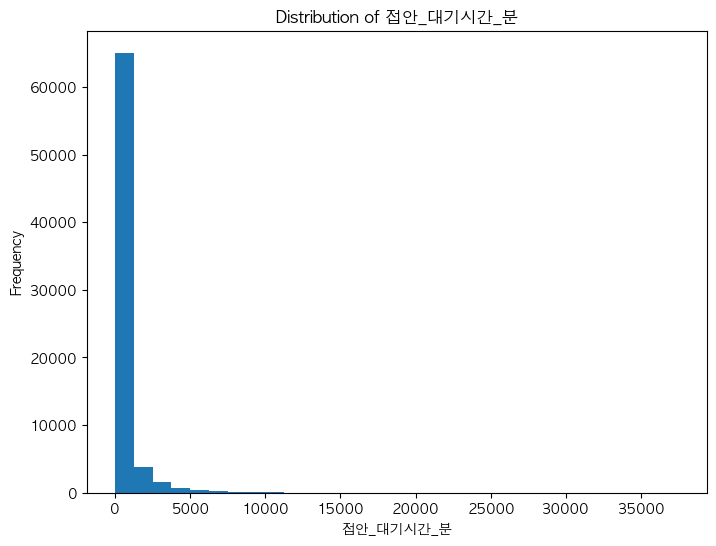

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df['접안_대기시간_분'], bins=30)
ax.set_title('Distribution of 접안_대기시간_분')
ax.set_xlabel('접안_대기시간_분')
ax.set_ylabel('Frequency')
plt.show()

In [40]:
df['대기율'].value_counts()

0.000000      55318
100.000000       38
200.000000       26
50.000000        22
33.333333        18
              ...  
126.129032        1
33.168317         1
304.761905        1
144.417476        1
77.697842         1
Name: 대기율, Length: 14221, dtype: int64

### 3. 모델 적용 프로세스 설계

- 1. Prophet, Arima, LSTM 적용
- 2. 로그 변환 및 스케일링 각 버전(3) - 로그변환, 지수평활법, 민맥스
- 3. 데이터 주기성 확보 파생변수 생성
- 4. y = 대기시간 or 대기율

##### 1. Prophet
- 데이터의 스케일이 크게 중요하지 않을 뿐만 아니라, 주로 시간에 따른 트렌드와 계절성을 자동으로 처리해주기 때문에 대부분의 경우 스케일 조정이 필요하지 않음 > 스케일링 생략

##### 2. LSTM (Long Short-Term Memory)
- 데이터의 스케일에 민감
- 여기서 '스케일'은 데이터의 크기와 분포를 나타냄
- Min-Max 스케일링이나 표준화 필요

##### 3. ARIMA (AutoRegressive Integrated Moving Average)
- 예측 성능에 영향을 줌
-0 정규화나 표준화를 통해 모델의 성능을 최적화 필요

##### 주의사항
표준화 vs. 정규화: 표준화는 데이터의중심과 퍼짐 정도를 조절하는 것이고, 정규화는 데이터의 범위를 조절하는 것

In [28]:
df.columns

Index(['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호', '입항일시', '출항일시',
       '접안_대기시간_분', '출항_대기시간_분', 'Service_Time_Start', 'Service_Time_End',
       '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도', 'Service_Time_분', '대기율', '총톤수',
       '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)',
       'ETA_Minute', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)',
       '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)',
       '파향(deg)'],
      dtype='object')

In [29]:
temp = df[['입항일시','선박용도','접안_대기시간_분','대기율', '총톤수',
       '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)',
       '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)',
       '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)',
       '파향(deg)']]

In [30]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72112 entries, 21970 to 1992
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   입항일시          72112 non-null  object 
 1   선박용도          72112 non-null  object 
 2   접안_대기시간_분     72112 non-null  int64  
 3   대기율           72112 non-null  float64
 4   총톤수           72112 non-null  float64
 5   재화중량톤수        72112 non-null  float64
 6   선박제원(총길이, m)  72112 non-null  float64
 7   선박제원(너비, m)   72112 non-null  float64
 8   만재흘수(m)       72112 non-null  float64
 9   깊이(m)         72112 non-null  float64
 10  길이1(m)        72112 non-null  float64
 11  풍속(m/s)       72112 non-null  float64
 12  풍향(deg)       72112 non-null  float64
 13  GUST풍속(m/s)   72112 non-null  float64
 14  현지기압(hPa)     72112 non-null  float64
 15  습도(%)         72112 non-null  float64
 16  기온(°C)        72112 non-null  float64
 17  수온(°C)        72112 non-null  float64
 18  최대파고(m)       72112 non

- 입항일시 > 한 시간 단위로 구간 조정 > ETA 컬럼 생성(2021-01-09 01)

In [31]:
temp['입항일시']

21970    2020-01-01 00:10:00
4603     2020-01-01 01:05:00
46120    2020-01-01 03:40:00
61365    2020-01-01 03:05:00
49158    2020-01-01 04:30:00
                ...         
13483    2022-12-31 09:45:00
63837    2022-12-31 10:05:00
25250    2022-12-31 15:55:00
3656     2022-12-31 17:55:00
1992     2022-12-31 18:00:00
Name: 입항일시, Length: 72112, dtype: object

In [32]:
temp['입항일시'] = pd.to_datetime(temp['입항일시'])
temp['ETA'] = temp['입항일시'].dt.strftime('%Y-%m-%d %H')

In [33]:
temp.drop(columns = '입항일시', inplace = True)

In [34]:
temp['선박용도'].value_counts()

석유제품 운반선       35961
케미칼 운반선         9828
풀컨테이너선          4123
견인용예선           3798
LPG 운반선         3502
일반화물선           3313
기타 예선           1819
기타 유조선          1659
산물선(벌크선)        1520
자동차운반선          1454
원유운반선           1449
급유선             1338
시멘트운반선           531
기타선              465
케미칼가스 운반선        345
압항 예선            192
모래운반선            178
이.접안용 예선         125
철강재 운반선          114
신조선               94
폐기물 운반선           86
관공선               55
LNG 운반선           52
코일전용선             41
용달선               29
세미(혼재)컨테이너선       26
여객선                7
군함                 3
원목운반선              1
기타 부선              1
유람선                1
냉동.냉장선             1
수상레저기구             1
Name: 선박용도, dtype: int64

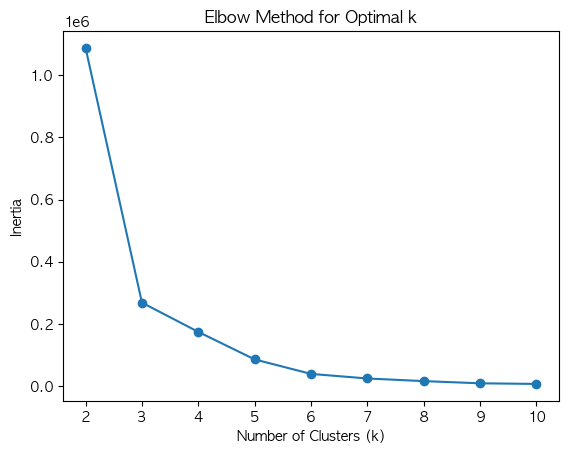

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 선박용도 - 레이블 인코딩 수행
label_encoder = LabelEncoder()
temp['선박용도_encoded'] = label_encoder.fit_transform(temp['선박용도'])

# K-평균 클러스터링
k_values = range(2, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(temp[['선박용도_encoded']])
    inertia_values.append(kmeans.inertia_)

# 엘보우 메서드- 최적의 클러스터 수 찾기
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [36]:
# 최적의 클러스터 수를 선택하여 클러스터링
optimal_k = 3  # 적절한 k 값으로 설정
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
temp['선박용도_cluster'] = kmeans.fit_predict(temp[['선박용도_encoded']])


In [37]:
# for cluster, purposes_encoded in clustered_ship_purposes.items():
#     purposes_original = label_encoder.inverse_transform(purposes_encoded)
#     print(f'Cluster {cluster}: {purposes_original}')

In [38]:
# temp = pd.get_dummies(temp, columns=['선박용도'], prefix='선박용도')

In [39]:
temp

,선박용도,접안_대기시간_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),...,기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),ETA,선박용도_encoded,선박용도_cluster
21970,석유제품 운반선,0,0.0,498.0,1108.000,59.40,10.0,4.1,4.60,55.01,...,3.8,17.5,4.4,3.0,2.1,10.7,36.0,2020-01-01 00,13,0
4603,석유제품 운반선,0,0.0,700.0,0.000,70.90,12.0,3.9,5.35,66.01,...,4.3,17.5,4.2,2.8,2.0,10.7,49.0,2020-01-01 01,13,0
46120,풀컨테이너선,0,0.0,9955.0,12383.000,135.00,24.8,8.2,11.20,135.00,...,4.3,17.4,3.9,2.2,1.5,9.1,48.0,2020-01-01 03,32,1
61365,LPG 운반선,0,0.0,2689.0,2999.000,96.00,15.0,7.2,7.20,90.10,...,4.3,17.4,3.9,2.2,1.5,9.1,48.0,2020-01-01 03,1,2
49158,석유제품 운반선,0,0.0,1130.0,2286.000,83.30,14.0,5.0,5.95,74.00,...,3.4,17.3,3.5,2.1,1.5,9.1,56.0,2020-01-01 04,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,석유제품 운반선,0,0.0,431.0,1034.000,54.10,10.0,4.6,4.60,54.01,...,5.7,16.1,2.2,1.6,1.1,5.3,0.0,2022-12-31 09,13,0
63837,케미칼 운반선,0,0.0,2579.0,3948.000,88.60,14.6,6.5,7.20,83.00,...,5.6,16.1,2.3,1.5,1.1,5.8,36.0,2022-12-31 10,28,1
25250,석유제품 운반선,0,0.0,1998.0,3612.258,79.99,14.0,6.0,7.30,79.99,...,7.8,16.1,2.4,1.5,1.0,5.8,6.0,2022-12-31 15,13,0
3656,석유제품 운반선,0,0.0,164.0,646.000,36.80,7.4,3.5,3.90,36.70,...,8.0,16.2,2.2,1.3,0.9,5.8,33.0,2022-12-31 17,13,0


#### 선박용도별 시각화

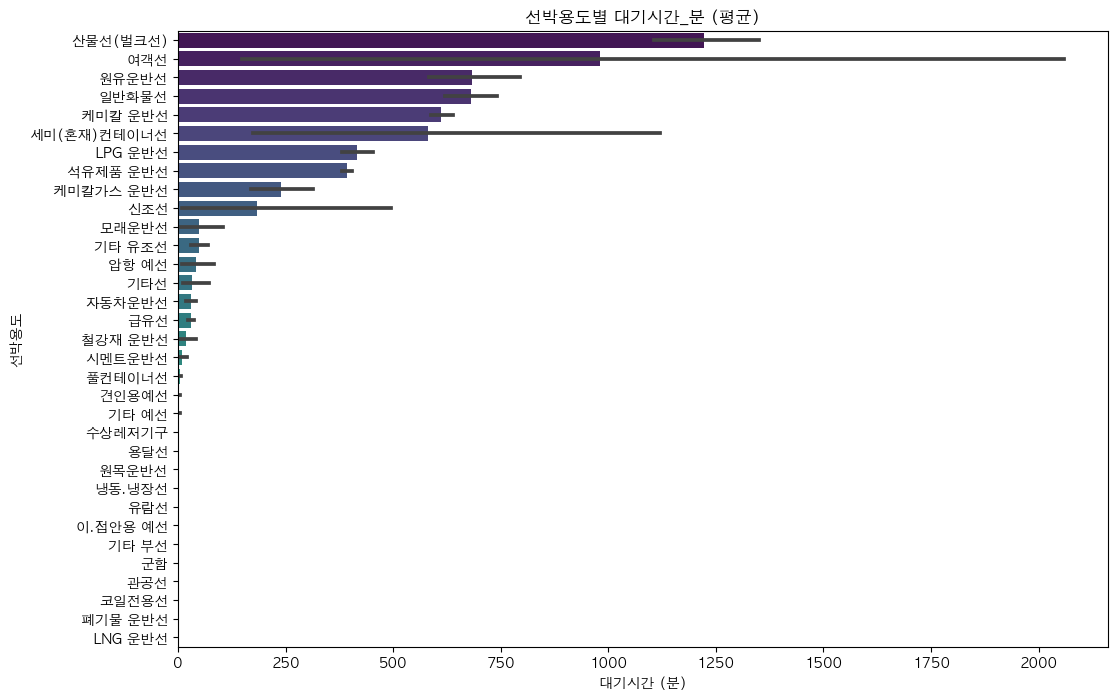

In [40]:
average_waiting_time = temp.groupby('선박용도')['접안_대기시간_분'].mean().sort_values(ascending=False)

# 시각화
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='접안_대기시간_분', y='선박용도', data=temp, order=average_waiting_time.index, palette='viridis', ax=ax)
ax.set_title('선박용도별 대기시간_분 (평균)')
ax.set_xlabel('대기시간 (분)')
ax.set_ylabel('선박용도')
plt.show()

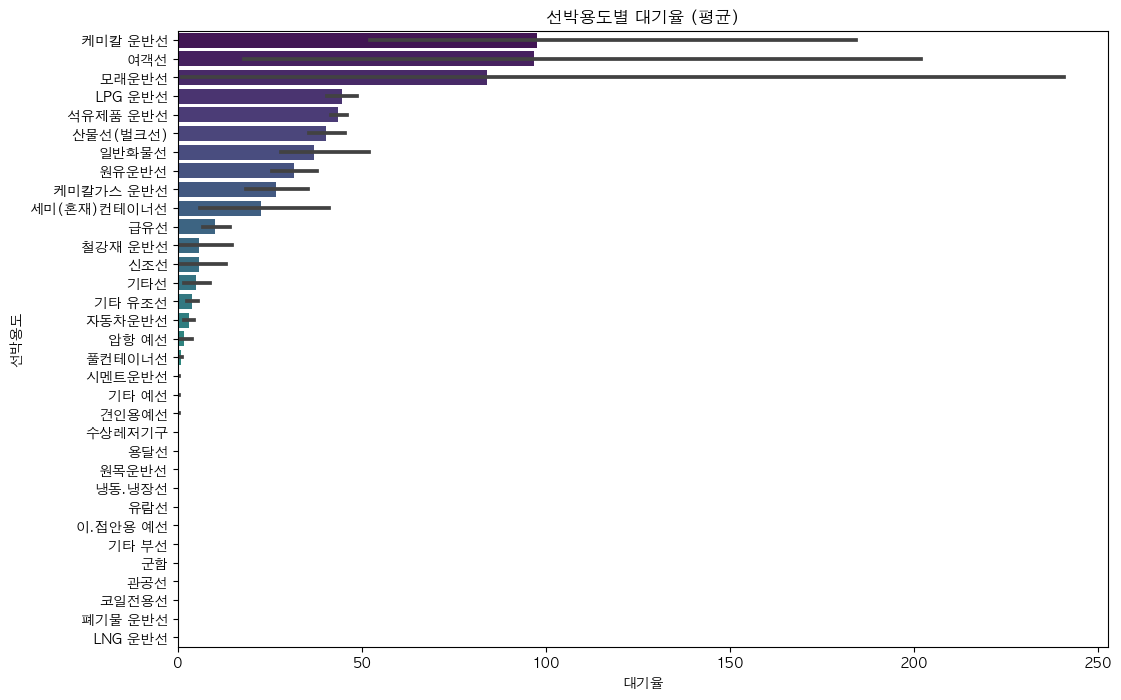

In [41]:
average_waiting_time_per = temp.groupby('선박용도')['대기율'].mean().sort_values(ascending=False)

# 시각화
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='대기율', y='선박용도', data=temp, order=average_waiting_time_per.index, palette='viridis', ax=ax)
ax.set_title('선박용도별 대기율 (평균)')
ax.set_xlabel('대기율')
ax.set_ylabel('선박용도')
plt.show()

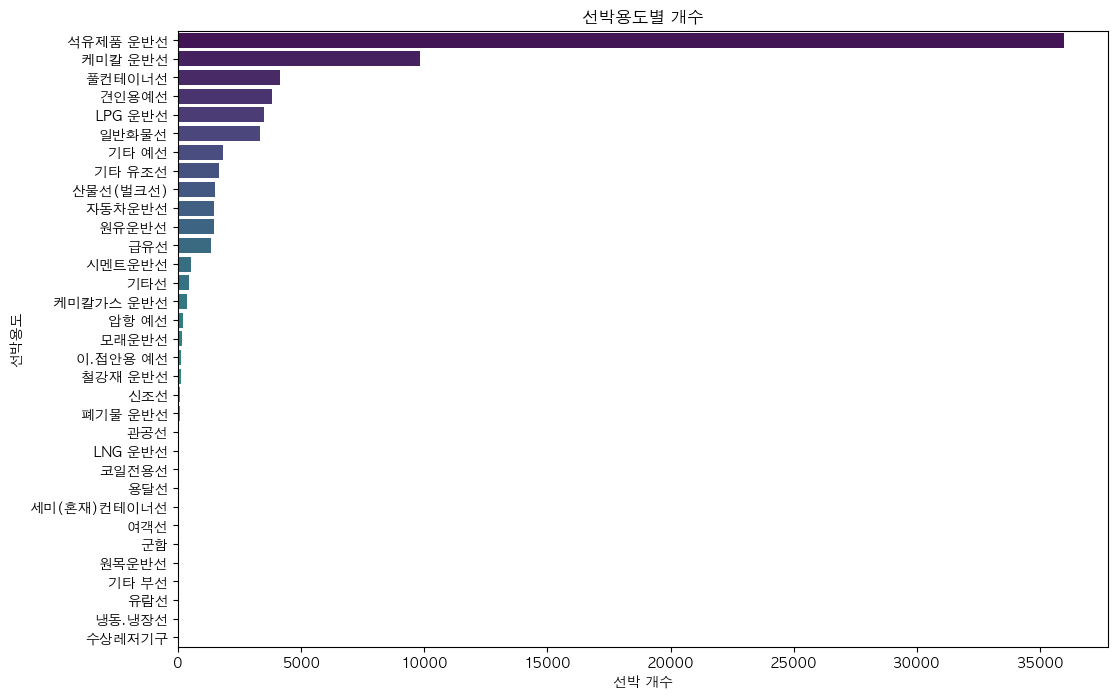

In [42]:
# 선박용도별 개수
ship_purpose_counts = temp['선박용도'].value_counts()

# 시각화
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y='선박용도', data=temp, order=ship_purpose_counts.index, palette='viridis', ax=ax)
ax.set_title('선박용도별 개수')
ax.set_xlabel('선박 개수')
ax.set_ylabel('선박용도')
plt.show()


#### 액체화물 그룹 구분

In [43]:
# 액체화물 그룹
liquid_cargo = ['석유제품 운반선', '케미칼 운반선', 'LPG 운반선']
temp['액체화물'] = temp['선박용도'].apply(lambda x: 1 if x in liquid_cargo else 0)

In [44]:
temp

,선박용도,접안_대기시간_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),...,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),ETA,선박용도_encoded,선박용도_cluster,액체화물
21970,석유제품 운반선,0,0.0,498.0,1108.000,59.40,10.0,4.1,4.60,55.01,...,17.5,4.4,3.0,2.1,10.7,36.0,2020-01-01 00,13,0,1
4603,석유제품 운반선,0,0.0,700.0,0.000,70.90,12.0,3.9,5.35,66.01,...,17.5,4.2,2.8,2.0,10.7,49.0,2020-01-01 01,13,0,1
46120,풀컨테이너선,0,0.0,9955.0,12383.000,135.00,24.8,8.2,11.20,135.00,...,17.4,3.9,2.2,1.5,9.1,48.0,2020-01-01 03,32,1,0
61365,LPG 운반선,0,0.0,2689.0,2999.000,96.00,15.0,7.2,7.20,90.10,...,17.4,3.9,2.2,1.5,9.1,48.0,2020-01-01 03,1,2,1
49158,석유제품 운반선,0,0.0,1130.0,2286.000,83.30,14.0,5.0,5.95,74.00,...,17.3,3.5,2.1,1.5,9.1,56.0,2020-01-01 04,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,석유제품 운반선,0,0.0,431.0,1034.000,54.10,10.0,4.6,4.60,54.01,...,16.1,2.2,1.6,1.1,5.3,0.0,2022-12-31 09,13,0,1
63837,케미칼 운반선,0,0.0,2579.0,3948.000,88.60,14.6,6.5,7.20,83.00,...,16.1,2.3,1.5,1.1,5.8,36.0,2022-12-31 10,28,1,1
25250,석유제품 운반선,0,0.0,1998.0,3612.258,79.99,14.0,6.0,7.30,79.99,...,16.1,2.4,1.5,1.0,5.8,6.0,2022-12-31 15,13,0,1
3656,석유제품 운반선,0,0.0,164.0,646.000,36.80,7.4,3.5,3.90,36.70,...,16.2,2.2,1.3,0.9,5.8,33.0,2022-12-31 17,13,0,1


In [45]:
temp.drop(columns = '선박용도', inplace = True)

In [46]:
temp

,접안_대기시간_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),풍속(m/s),...,수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),ETA,선박용도_encoded,선박용도_cluster,액체화물
21970,0,0.0,498.0,1108.000,59.40,10.0,4.1,4.60,55.01,7.6,...,17.5,4.4,3.0,2.1,10.7,36.0,2020-01-01 00,13,0,1
4603,0,0.0,700.0,0.000,70.90,12.0,3.9,5.35,66.01,9.3,...,17.5,4.2,2.8,2.0,10.7,49.0,2020-01-01 01,13,0,1
46120,0,0.0,9955.0,12383.000,135.00,24.8,8.2,11.20,135.00,12.6,...,17.4,3.9,2.2,1.5,9.1,48.0,2020-01-01 03,32,1,0
61365,0,0.0,2689.0,2999.000,96.00,15.0,7.2,7.20,90.10,12.6,...,17.4,3.9,2.2,1.5,9.1,48.0,2020-01-01 03,1,2,1
49158,0,0.0,1130.0,2286.000,83.30,14.0,5.0,5.95,74.00,11.4,...,17.3,3.5,2.1,1.5,9.1,56.0,2020-01-01 04,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,0,0.0,431.0,1034.000,54.10,10.0,4.6,4.60,54.01,11.4,...,16.1,2.2,1.6,1.1,5.3,0.0,2022-12-31 09,13,0,1
63837,0,0.0,2579.0,3948.000,88.60,14.6,6.5,7.20,83.00,12.2,...,16.1,2.3,1.5,1.1,5.8,36.0,2022-12-31 10,28,1,1
25250,0,0.0,1998.0,3612.258,79.99,14.0,6.0,7.30,79.99,7.3,...,16.1,2.4,1.5,1.0,5.8,6.0,2022-12-31 15,13,0,1
3656,0,0.0,164.0,646.000,36.80,7.4,3.5,3.90,36.70,4.8,...,16.2,2.2,1.3,0.9,5.8,33.0,2022-12-31 17,13,0,1


### 4. 로그변환 및 스케일링

- 로그변환

In [47]:
import numpy as np

temp['접안_대기시간_분_로그'] = np.log1p(temp['접안_대기시간_분'])

- Min Max 스케일링

- Standard 스케일링

### 5. 시계열 예측 모델 

In [48]:
df = temp.copy()

In [49]:
df

,접안_대기시간_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),풍속(m/s),...,최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),ETA,선박용도_encoded,선박용도_cluster,액체화물,접안_대기시간_분_로그
21970,0,0.0,498.0,1108.000,59.40,10.0,4.1,4.60,55.01,7.6,...,4.4,3.0,2.1,10.7,36.0,2020-01-01 00,13,0,1,0.0
4603,0,0.0,700.0,0.000,70.90,12.0,3.9,5.35,66.01,9.3,...,4.2,2.8,2.0,10.7,49.0,2020-01-01 01,13,0,1,0.0
46120,0,0.0,9955.0,12383.000,135.00,24.8,8.2,11.20,135.00,12.6,...,3.9,2.2,1.5,9.1,48.0,2020-01-01 03,32,1,0,0.0
61365,0,0.0,2689.0,2999.000,96.00,15.0,7.2,7.20,90.10,12.6,...,3.9,2.2,1.5,9.1,48.0,2020-01-01 03,1,2,1,0.0
49158,0,0.0,1130.0,2286.000,83.30,14.0,5.0,5.95,74.00,11.4,...,3.5,2.1,1.5,9.1,56.0,2020-01-01 04,13,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,0,0.0,431.0,1034.000,54.10,10.0,4.6,4.60,54.01,11.4,...,2.2,1.6,1.1,5.3,0.0,2022-12-31 09,13,0,1,0.0
63837,0,0.0,2579.0,3948.000,88.60,14.6,6.5,7.20,83.00,12.2,...,2.3,1.5,1.1,5.8,36.0,2022-12-31 10,28,1,1,0.0
25250,0,0.0,1998.0,3612.258,79.99,14.0,6.0,7.30,79.99,7.3,...,2.4,1.5,1.0,5.8,6.0,2022-12-31 15,13,0,1,0.0
3656,0,0.0,164.0,646.000,36.80,7.4,3.5,3.90,36.70,4.8,...,2.2,1.3,0.9,5.8,33.0,2022-12-31 17,13,0,1,0.0


In [50]:
df.to_csv('../data/formodel_dataset_ver1.csv', index = False, encoding = 'utf-8-sig')

#### 액체/비액체

In [48]:
df['선박용도'].value_counts()

석유제품 운반선       35960
케미칼 운반선         9828
풀컨테이너선          4123
견인용예선           3798
LPG 운반선         3502
일반화물선           3313
기타 예선           1819
기타 유조선          1659
산물선(벌크선)        1520
자동차운반선          1454
원유운반선           1449
급유선             1338
시멘트운반선           531
기타선              465
케미칼가스 운반선        345
압항 예선            192
모래운반선            178
이.접안용 예선         125
철강재 운반선          114
신조선               94
폐기물 운반선           86
관공선               55
LNG 운반선           52
코일전용선             41
용달선               29
세미(혼재)컨테이너선       26
여객선                7
군함                 3
원목운반선              1
기타 부선              1
유람선                1
냉동.냉장선             1
수상레저기구             1
Name: 선박용도, dtype: int64

In [50]:
# 액체화물 그룹
liquid_cargo = ['석유제품 운반선', '케미칼 운반선', 'LPG 운반선','기타 유조선','LPG 운반선, 원유 운반선, 케미칼가스 운반선','LNG 운반선']
df['액체화물'] = df['선박용도'].apply(lambda x: 1 if x in liquid_cargo else 0)

In [52]:
liquid = df[df['액체화물'] == 1]

In [59]:
liquid.to_csv('../data/액체_모델용.csv', index = False, encoding = 'utf-8-sig')

In [54]:
liquid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51001 entries, 0 to 72109
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Datetime            51001 non-null  datetime64[ns]
 1   ETA_Year            51001 non-null  int64         
 2   ETA_Month           51001 non-null  int64         
 3   ETA_Day             51001 non-null  int64         
 4   ETA_Hour            51001 non-null  int64         
 5   호출부호                51001 non-null  object        
 6   입항일시                51001 non-null  object        
 7   출항일시                51001 non-null  object        
 8   접안_대기시간_분           51001 non-null  int64         
 9   출항_대기시간_분           51001 non-null  float64       
 10  Service_Time_Start  51001 non-null  object        
 11  Service_Time_End    51001 non-null  object        
 12  계선장소_코드             51001 non-null  object        
 13  계선장소_숫자             51001 non-null  int64     

In [56]:
non_liquid = df[df['액체화물'] == 0]

In [60]:
non_liquid.to_csv('../data/비액체_모델용.csv', index = False, encoding = 'utf-8-sig')

#### Prophet

In [ ]:
pip install prophet

In [51]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 'ETA' datetime 형식으로 변환
df = pd.read_csv('../data/formodel_dataset_ver1.csv')
df['ETA'] = pd.to_datetime(df['ETA'])

# Prophet 모델을 위한 데이터프레임 준비
prophet_df = df[['ETA', '접안_대기시간_분_로그']]  # ETA와 예측할 대상 열 선택
prophet_df = prophet_df.rename(columns={'ETA': 'ds', '접안_대기시간_분_로그': 'y'})  # 열 이름 변경

# Prophet 모델 생성
model = Prophet()
model.fit(prophet_df)

# 향후 365일에 대한 데이터프레임 생성
future = model.make_future_dataframe(periods=365)

# 예측
forecast = model.predict(future)

# 예측 결과 시각화
fig = model.plot(forecast)
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

#### LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 데이터프레임 로드
df = pd.read_csv('../data/formodel_dataset_ver1.csv')
df['ETA'] = pd.to_datetime(df['ETA'])
df.set_index('ETA', inplace=True)

# LSTM 모델을 위한 데이터 준비
dataset = df['접안_대기시간_분_로그'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

# 데이터셋을 학습용과 테스트용으로 나누기
train_size = int(len(dataset_scaled) * 0.8)
test_size = len(dataset_scaled) - train_size
train, test = dataset_scaled[0:train_size, :], dataset_scaled[train_size:len(dataset_scaled), :]

# 데이터셋을 X와 y로 변환
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10  # 예측을 위해 사용할 과거 시간 단계 수
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
model.fit(np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1)), trainY, epochs=100, batch_size=1, verbose=2)

# 예측
trainPredict = model.predict(np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1)))
testPredict = model.predict(np.reshape(testX, (testX.shape[0], testX.shape[1], 1)))

# 예측 결과를 원래 스케일로 되돌리기
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 훈련 데이터와 테스트 데이터에 대한 예측과 실제 값 시각화
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(trainPredictPlot, label='Training Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.show()


2023-11-15 14:25:58.875597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
57678/57678 - 162s - loss: 0.0788 - 162s/epoch - 3ms/step
Epoch 2/100
57678/57678 - 149s - loss: 0.0786 - 149s/epoch - 3ms/step
Epoch 3/100
57678/57678 - 145s - loss: 0.0785 - 145s/epoch - 3ms/step
Epoch 4/100
57678/57678 - 137s - loss: 0.0785 - 137s/epoch - 2ms/step
Epoch 5/100
57678/57678 - 128s - loss: 0.0785 - 128s/epoch - 2ms/step
Epoch 6/100
57678/57678 - 127s - loss: 0.0785 - 127s/epoch - 2ms/step
Epoch 7/100
57678/57678 - 143s - loss: 0.0785 - 143s/epoch - 2ms/step
Epoch 8/100
57678/57678 - 138s - loss: 0.0785 - 138s/epoch - 2ms/step
Epoch 9/100
57678/57678 - 146s - loss: 0.0785 - 146s/epoch - 3ms/step
Epoch 10/100
57678/57678 - 135s - loss: 0.0785 - 135s/epoch - 2ms/step
Epoch 11/100
57678/57678 - 133s - loss: 0.0785 - 133s/epoch - 2ms/step
Epoch 12/100
57678/57678 - 136s - loss: 0.0785 - 136s/epoch - 2ms/step
Epoch 13/100
57678/57678 - 142s - loss: 0.0785 - 142s/epoch - 2ms/step
Epoch 14/100
57678/57678 - 140s - loss: 0.0785 - 140s/epoch - 2ms/step
Epoch 15/100
57